In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Single Instance Input
X = np.array(([0.5726, 0.5833]), dtype=float)

# Single Instance Output
Y = np.array(([0.7500]), dtype=float)


# Class
class ANN(object):
    
    # constructor, set up weights
    def __init__(self, lrIn = 0.01, actFxnIn = "sigmoid"):
        self.W1 = np.array(([-3.6,1.5,0.99],[-1.23,-3.6,1.4]), dtype=float) 
        self.W2 = np.array(([0.11],[2.22],[1.4]), dtype=float)
        self.learningRate = lrIn
        self.activationFunction = actFxnIn
    
    #sigmoid function
    def sigmoid(self, valuesIN):
        return 1/(1+np.exp(-valuesIN))
    
    #tanH function
    def tanH(self, valuesIN):
        return (1 - np.exp(-2*valuesIN))/(1+np.exp(-2*valuesIN))
    
    #Relu function
    def Relu(self, valuesIN):
        return np.maximum(valuesIN,0)
    
    
    #forward steps (remember slide 54)
    def forward(self, inputsX):
        # feedforward propagation
        self.Zi = np.dot(inputsX, self.W1)     # Step 1
        
        if self.activationFunction == "sigmoid":
            self.Ai = self.sigmoid(self.Zi)    # Step 2 Sigmoid
        elif self.activationFunction == "tanH":
            self.Ai = self.tanH(self.Zi)       # Step 2 Tan H
        else:
            self.Ai = self.Relu(self.Zi)       # Step 2 Relu
            
        self.Z4 = np.dot(self.Ai, self.W2)     # Step 3
        y_Hat = self.sigmoid(self.Z4)          # Step 4
        return y_Hat
    
    
    
    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)
    
    def tanHPrime(self, s):
        #derivative of sigmoid
        return (1 - (s*s))
    
    def ReluPrime(self, valuesIN):
        x = valuesIN[:]
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def backpropagation(self, X, Y, y_Hat):
        # backward propagate through the network
        # Caution here, as I added np.array conversions as we were passing a single 
        # instance through the netowrk.
        # If passing more than one use commented out code instead, as 1x1 matrix 
        # is automatically convereted to real number
        
        self.o_error = y_Hat - Y # error in output
        # Calculate Delta (yhat - Y)(yhat)(1 - yhat) if Sigmoid
        self.o_delta = np.array(([self.o_error*self.sigmoidPrime(y_Hat)]), dtype=float) 
        
        
        # calculate error for A hidden layer (includes delta)
        self.Ai_error = self.o_delta.dot(self.W2.T) 
        
        #LR * W2n * Delta
        self.W2 -= self.learningRate * np.array(([self.Ai]), dtype=float).T.dot(self.o_delta)  
        
        
        
        # calculate inner delta
        if self.activationFunction == "sigmoid":
            self.Ai_delta = self.Ai_error*self.sigmoidPrime(self.Ai)   # Step Sigmoid
        elif self.activationFunction == "tanH":
            self.Ai_delta = self.Ai_error*self.tanHPrime(self.Ai)      # Step Tan H
        else:
            self.Ai_delta = self.Ai_error*self.ReluPrime(self.Ai)      # Step Relu
              
        
        #LR * W1n * A delta
        self.W1 -= self.learningRate * np.array(([X]), dtype=float).T.dot(self.Ai_delta) 
        
        """
        self.o_error = Y - y_Hat # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(y_Hat) 

        self.Ai_error = self.o_delta.dot(self.W2.T) 
        
        if self.activationFunction == "sigmoid":
            self.Ai_delta = self.Ai_error*self.sigmoidPrime(self.Ai)   # Step Sigmoid
        elif self.activationFunction == "tanH":
            self.Ai_delta = self.Ai_error*self.tanHPrime(self.Ai)      # Step Tan H
        else:
            self.Ai_delta = self.Ai_error*self.ReluPrime(self.Ai)      # Step ReLu

        self.W1 -= self.learningRate * X.T.dot(self.Ai_delta) 
        self.W2 -= self.learningRate * self.Ai.T.dot(self.o_delta)
        """
        
    def train(self, X, Y):
        y_Hat = self.forward(X)
        self.backpropagation(X, Y, y_Hat) 


***************************
Epoch 1 
***************************
Predicted Score:	 83.53 %
Loss: 			 0.0036381498369940225

***************************
Epoch 2 
***************************
Predicted Score:	 83.46 %
Loss: 			 0.0035813970626570623

***************************
Epoch 3 
***************************
Predicted Score:	 83.4 %
Loss: 			 0.0035252230499144437

***************************
Epoch 4 
***************************
Predicted Score:	 83.33 %
Loss: 			 0.0034696291161296217

***************************
Epoch 5 
***************************
Predicted Score:	 83.26 %
Loss: 			 0.0034146164032775226

***************************
Epoch 6 
***************************
Predicted Score:	 83.2 %
Loss: 			 0.003360185878877654

***************************
Epoch 7 
***************************
Predicted Score:	 83.13 %
Loss: 			 0.0033063383370521824

***************************
Epoch 8 
***************************
Predicted Score:	 83.07 %
Loss: 			 0.0032530743997066197

**********

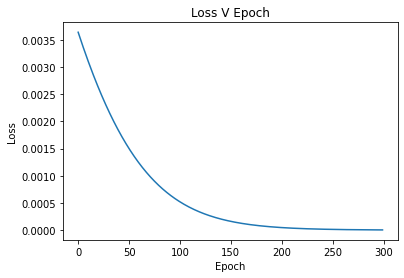

In [9]:
lossPerEpoch = []
lr = 0.5
epochs = 300
actFunction = "sigmoid"

NN = ANN(lr, actFunction)

for i in range(epochs):
    print("\n***************************\nEpoch", (i+1),"\n***************************")
    y_Hat = NN.forward(X)
    # back to sclae
    print("Predicted Score:\t",round(y_Hat[0] * 100,2),"%")
    loss = 0.5*(np.square(Y - y_Hat))
    print("Loss: \t\t\t", loss[0]) 
    NN.train(X, Y)
    lossPerEpoch.append(loss)

plt.plot(lossPerEpoch)
plt.title("Loss V Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


***************************
Epoch 1 
***************************
Predicted Score:	 87.4 %
Loss: 			 0.007689271751156886

***************************
Epoch 2 
***************************
Predicted Score:	 87.16 %
Loss: 			 0.007390041621435853

***************************
Epoch 3 
***************************
Predicted Score:	 86.91 %
Loss: 			 0.007096246906342346

***************************
Epoch 4 
***************************
Predicted Score:	 86.67 %
Loss: 			 0.006808224568932778

***************************
Epoch 5 
***************************
Predicted Score:	 86.42 %
Loss: 			 0.0065262859916992225

***************************
Epoch 6 
***************************
Predicted Score:	 86.18 %
Loss: 			 0.00625071540293973

***************************
Epoch 7 
***************************
Predicted Score:	 85.94 %
Loss: 			 0.005981768608168171

***************************
Epoch 8 
***************************
Predicted Score:	 85.7 %
Loss: 			 0.005719672036802218

*****************

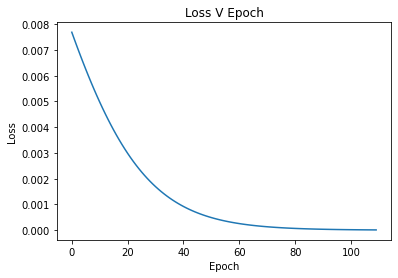

In [17]:
lossPerEpoch = []
lr = 0.5
epochs = 110
actFunction = "relu"

NN = ANN(lr, actFunction)

for i in range(epochs):
    print("\n***************************\nEpoch", (i+1),"\n***************************")
    y_Hat = NN.forward(X)
    # back to sclae
    print("Predicted Score:\t",round(y_Hat[0] * 100,2),"%")
    loss = 0.5*(np.square(Y - y_Hat))
    print("Loss: \t\t\t", loss[0]) 
    NN.train(X, Y)
    lossPerEpoch.append(loss)

plt.plot(lossPerEpoch)
plt.title("Loss V Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


***************************
Epoch 1 
***************************
Predicted Score:	 87.4 %
Loss: 			 0.007689271751156886

***************************
Epoch 2 
***************************
Predicted Score:	 87.16 %
Loss: 			 0.007390041621435853

***************************
Epoch 3 
***************************
Predicted Score:	 86.91 %
Loss: 			 0.007096246906342346

***************************
Epoch 4 
***************************
Predicted Score:	 86.67 %
Loss: 			 0.006808224568932778

***************************
Epoch 5 
***************************
Predicted Score:	 86.42 %
Loss: 			 0.0065262859916992225

***************************
Epoch 6 
***************************
Predicted Score:	 86.18 %
Loss: 			 0.00625071540293973

***************************
Epoch 7 
***************************
Predicted Score:	 85.94 %
Loss: 			 0.005981768608168171

***************************
Epoch 8 
***************************
Predicted Score:	 85.7 %
Loss: 			 0.005719672036802218

*****************

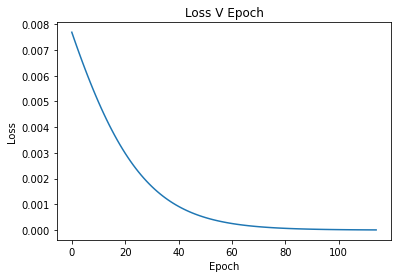

In [22]:
lossPerEpoch = []
lr = 0.5
epochs = 115
actFunction = "tanh"

NN = ANN(lr, actFunction)

for i in range(epochs):
    print("\n***************************\nEpoch", (i+1),"\n***************************")
    y_Hat = NN.forward(X)
    # back to sclae
    print("Predicted Score:\t",round(y_Hat[0] * 100,2),"%")
    loss = 0.5*(np.square(Y - y_Hat))
    print("Loss: \t\t\t", loss[0]) 
    NN.train(X, Y)
    lossPerEpoch.append(loss)

plt.plot(lossPerEpoch)
plt.title("Loss V Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()